In [1]:
import sqlite3
import pandas as pd

In [2]:
sqlite_connection = sqlite3.connect('test.db')

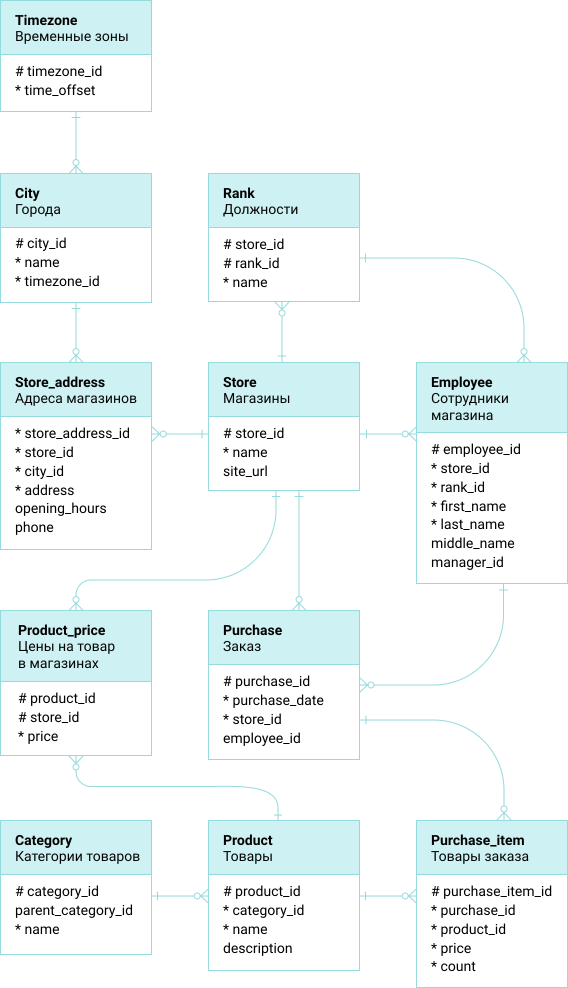

### Task 1

For each product, get the minimum and maximum cost from the product_price table. Output the columns:

- product_id - product identifier;
- price_min - the minimum cost of the product;
- price_max - the maximum cost of the product.

As a result, leave only those products for which the minimum and maximum cost are different.

Sort the result by the product ID.

In [3]:
def execiute_query(query, connection=sqlite_connection):
    return pd.read_sql(query, connection)

In [20]:
q = '''
WITH prices_agg
     AS (SELECT p.product_id,
                Min(p.price) AS price_min,
                Max(p.price) AS price_max
         FROM   product_price p
         GROUP  BY p.product_id)
SELECT t.product_id,
       p.price_min,
       p.price_max
FROM   product t
       LEFT JOIN prices_agg p
              ON t.product_id = p.product_id
WHERE  p.price_min != p.price_max
ORDER  BY t.product_id 
'''

execiute_query(q)

,product_id,price_min,price_max
0,1,10500.0,12500.0
1,2,26100.0,27500.0
2,3,22000.0,22900.0
3,4,20000.0,22000.0
4,5,23500.0,24600.0
5,6,17800.0,17900.0
6,8,37000.0,38300.0
7,9,43800.0,44500.0
8,10,75600.0,76800.0


Создавала итоговый запрос в несколько итераций, присоединяя по кусочку и выводя результат, чтобы убедиться в корректности.
1. Собрала подзапрос с группировкой `min/max` цен по `product_id` из `product_price`;
2. Приджойнила к `product` подзапрос с группировкой;
3. Указала условие фильтрации (различия между ценами) и порядок отображения записей. 